# csv 파일로 소행성의 광도 곡선 그리기

* 이 노트북을 구글 코랩에서 실행하고자 한다면 [파일] - [드라이브에 사본 저장]을 하여 본인의 소유로 만든 후에 코드를 실행하거나 수정할 수 있습니다.

* 이 파일은 실제 수업에 사용하므로 필요에 따라 예고 없이 변경될 수 있습니다.

* If you have any questions or comments on this document, please email me(Kiehyun.Park@gmail.com).

* 이 파일(문서)는 공교육 현장에서 수업시간에 자유롭게 사용할 수 있으나, 다른 목적으로 사용할 시에는 사전에 연락을 주셔서 상의해 주시기 바랍니다.

이 자료는 측광결과가 저장되어 있는 csv 파일로 부터 소행성의 광도 곡선을 만드는 과정을 설명합니다.

## 필요한 환경



### 한글 폰트 설치 (matplotlib에서 한글 폰트 깨질 경우)

구글 코랩에서 현재의 Jupyter notebook을 실행한다면 matplotlib 그래프에 한글을 사용하기 위해서 폰트를 설치해야 합니다.

아래 코드의 주석을 제거한 후에 셀을 실해 주세요. 그리고 나서 런타임 다시 시작을 해 줘야 matplotlib 그래프에서 한글을 사용할 수 있습니다.

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

#### 런타임 다시 시작

위의 셀을 실행한 다음 반드시 다음 과정을 수행해야 합니다.

* [메뉴]-[런타임]-[런터임 다시 시작]

* [메뉴]-[런타임]-[이전 셀 실행]

#### 한글 폰트 사용

위에서 한글 폰트를 설치하고, 런타임 다시시작을 했다면 구글 코랩에서 폰트 경로를 설정하여 한글 사용이 가능해 집니다.

In [2]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

plt.rcParams.update({'figure.max_open_warning': 0})

import warnings
warnings.filterwarnings('ignore')

### 모듈 설치 및 버전 확인

아래 셀을 실행하면 이 노트북을 실행하는데 필요한 모듈을 설치하고 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

In [3]:
import importlib, sys, subprocess
packages = "numpy, pandas, matplotlib, astroquery, requests, astropy, certifi, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else:
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
**** astroquery module is now installed.
******** requests module is already installed.
******** astropy module is already installed.
******** certifi module is already installed.
**** version_information module is now installed.
This notebook was generated at 2024-12-06 00:08:21 (UTC = GMT+0000) 
0 Python     3.10.12 64bit [GCC 11.4.0]
1 IPython    7.34.0
2 OS         Linux 6.1.85+ x86_64 with glibc2.35
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.8.0
6 astroquery 0.4.7
7 requests   2.32.3
8 astropy    6.1.7
9 certifi    2024.08.30
10 version_information 1.0.4


## 데이터 저장

### 데이터 저장 폴더 생성

데이터를 저장할 폴더를 "light_curve_asteroid" 라는 이름으로 생성해 보겠습니다.

* 만약 리눅스 시스템 이라면 shell 명령어로 가능한데, "!"를 붙이면 shell 명령어를 실행할 수 있습니다.
> !mkdir light_curve_asteroid

아래 코드를 실행하면 OS의 영향을 받지 않기 위하여 pathlib을 사용하여 폴더를 생성할 수 있습니다.

In [4]:
import os
from pathlib import Path
BASEPATH = Path("./")
save_dir_name = "light_curve_asteroid"
print(f"BASEPATH: {BASEPATH}")

if not (BASEPATH/save_dir_name).exists():
    os.mkdir(str(BASEPATH/save_dir_name))
    print (f"{str(BASEPATH/save_dir_name)} is created...")
else :
    print (f"{str(BASEPATH/save_dir_name)} is already exist...")

BASEPATH: .
light_curve_asteroid is created...


shell 명령어로 폴더가 생성되었는지 확인해 봅니다.

폴더 생성을 확인하는 또 다른 방법은 이 창 오른쪽에서 [파일] 목록을 확인해 볼 수 있습니다.

In [5]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Dec  6 00:08 .
drwxr-xr-x 1 root root 4096 Dec  6 00:05 ..
drwxr-xr-x 4 root root 4096 Dec  4 14:23 .config
drwxr-xr-x 2 root root 4096 Dec  6 00:08 light_curve_asteroid
drwxr-xr-x 1 root root 4096 Dec  4 14:23 sample_data


### 측광 결과 다운로드

경기과학고등학교 천문대에서 CCD 측광 결과를 csv 파일로 구글 드라이브에 저장해 놓았습니다.

GNU Wget은 HTTP 통신 또는 FTP 통신을 사용해 서버에서 파일 또는 콘텐츠를 다운로드할 때 사용하는 소프트웨어입니다. Wget의 특징은 여러 파일을 한 번에 다운로드하거나 웹 페이지의 링크를 순회하며 여러 콘텐츠를 자동으로 다운로드할 때 매우 편리합니다.

MS Windows에서는 별도로 설치를 해줘야 하며,
구글 코랩도 wget을을 지원해주니 아래 셀을 실행하면 자신의 [작업 영역]에 저장됩니다. 하지만 이 파일은 이 런타임이 재실행 될때는 삭제됨에 유의하시기 바랍니다.

아래 코드를 실행하면 여러분의 작업영역에 해당 파일을 저장할 것입니다.

In [6]:
fname = "216KLEOPATRA_result_photometry.zip"
fid = "1seLqmh1dTdsYmyCtQuSUkKNSXokfkTu4"

# wget을 이용(나의 구글 드라이브에서 공유한 파일을 구글 코랩에서 사용할 경우)
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid}" -O {save_dir_name}/{fname}

# gdown을 이용(나의 구글 드라이브에서 공유한 파일을 다운로드)
#!gdown {fid} -O {save_dir_name}/{fname}

--2024-12-06 00:08:22--  https://docs.google.com/uc?export=download&id=1seLqmh1dTdsYmyCtQuSUkKNSXokfkTu4
Resolving docs.google.com (docs.google.com)... 172.253.63.100, 172.253.63.101, 172.253.63.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1seLqmh1dTdsYmyCtQuSUkKNSXokfkTu4&export=download [following]
--2024-12-06 00:08:22--  https://drive.usercontent.google.com/download?id=1seLqmh1dTdsYmyCtQuSUkKNSXokfkTu4&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 833711 (814K) [application/octet-stream]
Saving to: ‘light_curve_asteroid/216KLEOPATRA_result_photometry.zip’

light_curve_asteroi 100%[==

### 데이터 확인

* 코랩을 사용할 경우에는 오른쪽의 [파일]창에서 확인할 수 있습니다.
* linux shell 명령어로 다음과 같이 확인해 볼 수 있습니다.
> ls -l light_curve_asteroid

OS의 영향을 받지 않고 파이썬으로 확인하는 방법은 아래와 같이 하면 됩니다.

In [7]:
from pathlib import Path
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.zip')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('light_curve_asteroid/216KLEOPATRA_result_photometry.zip')]
len(fpaths): 1


### 압축 풀기


In [8]:
import shutil

shutil.unpack_archive(str(fpaths[0]), str(BASEPATH/save_dir_name))
print(str(fpaths[0]), "is unpacked to", str(BASEPATH/save_dir_name))

light_curve_asteroid/216KLEOPATRA_result_photometry.zip is unpacked to light_curve_asteroid


### 압축 해제된 파일 확인

shell 명령어로 파일이 생성되었는지 확인해 보자.
역시 마찬가지로 이 창 오른쪽에서 [파일] 목록을 확인해 볼 수 있습니다.

In [9]:
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.csv')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-15-50_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-25-33_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-35-18_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-45-02_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-54-45_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-11-04-29_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-11-14-13_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv'), PosixPath('light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10

## 데이터 처리하기

### csv 파일 확인하기

다음의 cat 명령어로 csv 파일의 내용을 볼 수 있습니다.

In [10]:
!cat {fpaths[0]}

,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,flux_err,mag_ann,merr_ann,filename,t_start,t_expos,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,B_magnitude,RAJ2000,DEJ2000
0,1,154.63614849136073,54.51938130891681,1385551.4541015625,11859.565396063343,237.46676091117428,1002.0,5.0,44266.20727211097,1711.683117813147,-11.615180783072493,0.0419831841625582,216KLEOPATRA_LIGHT_B_2022-10-25-10-15-50_240sec_RILA600_STX-16803_-20c_2bin,2022-10-25T10:15:50.000,240.0,2022-10-25T10:17:50.000,B,-24.994847261040288,-25.09287550848619,0.030540024167580865,13.379666477967795,339.6555068945376,3.704395285584142
1,2,979.1911000361008,55.16519403897815,1363373.171875,11802.046050358007,165.25050784507505,1006.0,2.0,28593.209786206717,1516.7926724100246,-11.140657276659407,0.05759537777888196,216KLEOPATRA_LIGHT_B_2022-10-25-10-15-50_240sec_RILA600_STX-16803_-20c_2bin,2022-10-25T10:15:50.000,240.0,2022-10-25T10:17:50.000,B,-24.994847261040288,-25.09287550848619,0.030540024167580865,13.

### 데이타프레임 만들기

각각의 csv 파일을 데이터프레임으로 만들어 하나로 합쳐보겠습니다.

In [11]:
import pandas as pd

df = pd.DataFrame()
for fpath in fpaths[:]:
    fpath = Path(fpath)
    print(f"Reading csv file... {fpath}")
    df_csv = pd.read_csv(fpath)
    df = pd.concat([df, df_csv], axis=0)

Reading csv file... light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-15-50_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-25-33_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-35-18_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-45-02_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-10-54-45_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-11-04-29_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... light_curve_asteroid/216KLEOPATRA_LIGHT_B_2022-10-25-11-14-13_240sec_RILA600_STX-16803_-20c_2bin_result_photometry.csv
Reading csv file... light_c

### 데이타프레임 확인

75개의 csv 파일을 하나의 데이터프레임을 만들었습니다.

In [12]:
print(len(df_csv))
df_csv
print(len(df))
df

97
6213


,Unnamed: 0,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,...,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,B_magnitude,RAJ2000,DEJ2000,R_magnitude,V_magnitude
0,0,1,154.636148,54.519381,1.385551e+06,11859.565396,237.466761,1002.0,5.0,44266.207272,...,2022-10-25T10:17:50.000,B,-24.994847,-25.092876,0.030540,13.379666,339.655507,3.704395,NaN,NaN
1,1,2,979.191100,55.165194,1.363373e+06,11802.046050,165.250508,1006.0,2.0,28593.209786,...,2022-10-25T10:17:50.000,B,-24.994847,-25.092876,0.030540,13.854190,339.651639,3.420156,NaN,NaN
2,2,3,1909.742121,94.398248,1.633359e+06,11748.216287,169.153489,1000.0,7.0,304667.211605,...,2022-10-25T10:17:50.000,B,-24.994847,-25.092876,0.030540,11.285283,339.660413,3.099337,NaN,NaN
3,3,4,1909.335319,95.070445,1.592351e+06,11746.745652,168.134266,999.0,7.0,263825.739598,...,2022-10-25T10:17:50.000,B,-24.994847,-25.092876,0.030540,11.441554,339.660647,3.099473,NaN,NaN
4,4,5,525.707860,137.155484,1.336371e+06,11791.173641,164.166287,1002.0,2.0,2820.207737,...,2022-10-25T10:17:50.000,B,-24.994847,-25.092876,0.030540,16.369145,339.682261,3.575999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,93,1854.653238,1964.878848,7.753437e+05,6753.483372,74.714010,1000.0,6.0,11542.679347,...,2022-10-25T14:14:23.952,V,-24.805564,-24.866830,0.013724,NaN,340.197014,3.095055,NaN,14.649798
93,93,94,1406.391580,1969.329065,8.301570e+05,6906.014701,79.441133,1004.0,1.0,49105.101519,...,2022-10-25T14:14:23.952,V,-24.805564,-24.866830,0.013724,NaN,340.201782,3.249539,NaN,13.077748
94,94,95,528.958934,1970.466631,8.154937e+05,7114.182489,77.275639,1006.0,2.0,10898.644102,...,2022-10-25T14:14:23.952,V,-24.805564,-24.866830,0.013724,NaN,340.208505,3.551986,NaN,14.712133
95,95,96,1682.905729,1977.625326,1.127368e+06,6880.363855,84.627927,1006.0,1.0,349217.617490,...,2022-10-25T14:14:23.952,V,-24.805564,-24.866830,0.013724,NaN,340.202652,3.154164,NaN,10.947824


In [13]:
df.columns

Index(['Unnamed: 0', 'id', 'xcenter', 'ycenter', 'aperture_sum', 'msky',
       'sky_std', 'nsky', 'nrej', 'flux_star', 'flux_err', 'mag_ann',
       'merr_ann', 'filename', 't_start', 't_expos', 't_middle', 'filter',
       'zeropt_med', 'zeropt_avg', 'e_zeropt', 'B_magnitude', 'RAJ2000',
       'DEJ2000', 'R_magnitude', 'V_magnitude'],
      dtype='object')

### 데이터 프레임 정리

reset_index를 실행하고, 관측 시각을 to_datetime으로 변환해 줍니다.

In [14]:
df['t_middle_dt'] = pd.to_datetime(df['t_middle'])
df = df.drop(columns=['Unnamed: 0'], axis=0)
# df.drop(['Unnamed: 0', 'id'], axis=0)
# df = df.set_index('id')
df = df.reset_index(drop=True)
df

,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,flux_err,...,filter,zeropt_med,zeropt_avg,e_zeropt,B_magnitude,RAJ2000,DEJ2000,R_magnitude,V_magnitude,t_middle_dt
0,1,154.636148,54.519381,1.385551e+06,11859.565396,237.466761,1002.0,5.0,44266.207272,1711.683118,...,B,-24.994847,-25.092876,0.030540,13.379666,339.655507,3.704395,NaN,NaN,2022-10-25 10:17:50.000
1,2,979.191100,55.165194,1.363373e+06,11802.046050,165.250508,1006.0,2.0,28593.209786,1516.792672,...,B,-24.994847,-25.092876,0.030540,13.854190,339.651639,3.420156,NaN,NaN,2022-10-25 10:17:50.000
2,3,1909.742121,94.398248,1.633359e+06,11748.216287,169.153489,1000.0,7.0,304667.211605,1635.184648,...,B,-24.994847,-25.092876,0.030540,11.285283,339.660413,3.099337,NaN,NaN,2022-10-25 10:17:50.000
3,4,1909.335319,95.070445,1.592351e+06,11746.745652,168.134266,999.0,7.0,263825.739598,1617.170526,...,B,-24.994847,-25.092876,0.030540,11.441554,339.660647,3.099473,NaN,NaN,2022-10-25 10:17:50.000
4,5,525.707860,137.155484,1.336371e+06,11791.173641,164.166287,1002.0,2.0,2820.207737,1503.744828,...,B,-24.994847,-25.092876,0.030540,16.369145,339.682261,3.575999,NaN,NaN,2022-10-25 10:17:50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,93,1854.653238,1964.878848,7.753437e+05,6753.483372,74.714010,1000.0,6.0,11542.679347,1053.096009,...,V,-24.805564,-24.866830,0.013724,NaN,340.197014,3.095055,NaN,14.649798,2022-10-25 14:14:23.952
6209,94,1406.391580,1969.329065,8.301570e+05,6906.014701,79.441133,1004.0,1.0,49105.101519,1092.309083,...,V,-24.805564,-24.866830,0.013724,NaN,340.201782,3.249539,NaN,13.077748,2022-10-25 14:14:23.952
6210,95,528.958934,1970.466631,8.154937e+05,7114.182489,77.275639,1006.0,2.0,10898.644102,1080.416297,...,V,-24.805564,-24.866830,0.013724,NaN,340.208505,3.551986,NaN,14.712133,2022-10-25 14:14:23.952
6211,96,1682.905729,1977.625326,1.127368e+06,6880.363855,84.627927,1006.0,1.0,349217.617490,1260.076061,...,V,-24.805564,-24.866830,0.013724,NaN,340.202652,3.154164,NaN,10.947824,2022-10-25 14:14:23.952


## Plot light curve of asteroid


### 타겟 설정

파일명으로 부터 관측 대상의 이름을 얻어옵니다.

In [15]:
targ_name = fpath.parts[-1].split("_")[0]
targ_name = targ_name.replace("-"," ")
targ_name = ''.join([i for i in targ_name  if not i.isdigit()])
print("targ_name :", targ_name)

targ_name : KLEOPATRA


### (과제)

[이곳](https://www.minorplanetcenter.net/iau/lists/t_atens.html)에 있는 "1976 AA"와 같은 소행성의 임시번호를 부여하는 규칙에 대해 조사하여 아래 코딩셀에 저장하여 출력하시오.

In [16]:
# 이곳에 코딩을 완성하여 제출하시오.


### 관측 시각 조사

In [17]:
check_ttimes = df[['t_middle_dt']].drop_duplicates()
check_ttimes = check_ttimes.reset_index(drop=True)
check_ttimes

,t_middle_dt
0,2022-10-25 10:17:50.000
1,2022-10-25 10:27:33.367
2,2022-10-25 10:37:18.227
3,2022-10-25 10:47:02.375
4,2022-10-25 10:56:45.532
...,...
70,2022-10-25 13:35:30.458
71,2022-10-25 13:45:13.691
72,2022-10-25 13:54:56.783
73,2022-10-25 14:04:40.274


### (**) 데이타프레임 필터링

아래와 같이 jpl Horizons로 부터 해당 시각 소생성의 좌표를 구하여 그에 해당하는 측광 결과만을 모아서 df_targ에 저장합니다.

타켓의 좌표에 해당하는 데이터를 필터링 하는데, 좌표의 오차가 있을 수 있고, 관측 오차가 큰 별이 있을 수 있어 아래 두 변수를 이용하여 데이타프레임을 필터링 해 보겠습니다.

* coord_delta = 0.0005
* ERR_Min = 1

시간이 많이 걸림에 유의하세요.

In [18]:
#아래 변수는 변경 가능
coord_delta = 0.0005
ERR_Min = 1

# Observed location
LOCATION = dict(lon=127.005, lat=37.308889, elevation=101)

from astroquery.jplhorizons import Horizons
from astropy.coordinates import SkyCoord
from astropy.time import Time

df_targ = pd.DataFrame()
for idx, row in check_ttimes.iterrows() :
    print(idx, row)
    targ_ttime = Time(row['t_middle_dt'])

    obj = Horizons(id=targ_name, location=LOCATION, epochs=targ_ttime.jd)
    result_table = obj.ephemerides()
    print("result_table : {}".format(result_table ))

    pos_sky = SkyCoord(result_table ["RA"][0], result_table ["DEC"][0], unit='deg')
    print("pos_sky: {}".format(pos_sky))

    if not result_table :
        print("there is no result...")
    else :
        # print(result_table.columns)
        print("result_table :", result_table)

        targ_sky = pos_sky
        print("targ_sky :", targ_sky)

        # 각 관측 파일 내에서 적경 적위가 소행성의 좌표와 가까운 자료를 선택해 보자. :
        df_one = df.loc[(df["RAJ2000"] > targ_sky.ra.value*(1-coord_delta)) \
                        & (df["RAJ2000"] < targ_sky.ra.value*(1+coord_delta)) \
                        & (df["DEJ2000"] > targ_sky.dec.value*(1-coord_delta))\
                        & (df["DEJ2000"] < targ_sky.dec.value*(1+coord_delta))\
                        & (df['t_middle_dt'] == row['t_middle_dt'])]
        print("df_one :", df_one)
        df_targ = pd.concat([df_targ, df_one], axis=0)

0 t_middle_dt   2022-10-25 10:17:50
Name: 0, dtype: datetime64[ns]
result_table :        targetname             datetime_str          datetime_jd    ... alpha_true  PABLon  PABLat
          ---                     ---                    d         ...    deg       deg     deg  
----------------------- ------------------------ ----------------- ... ---------- -------- ------
216 Kleopatra (A880 GB) 2022-Oct-25 10:17:50.000 2459877.929050926 ...    20.5717 353.1152 9.2041
pos_sky: <SkyCoord (ICRS): (ra, dec) in deg
    (339.95827, 3.49926)>
result_table :        targetname             datetime_str          datetime_jd    ... alpha_true  PABLon  PABLat
          ---                     ---                    d         ...    deg       deg     deg  
----------------------- ------------------------ ----------------- ... ---------- -------- ------
216 Kleopatra (A880 GB) 2022-Oct-25 10:17:50.000 2459877.929050926 ...    20.5717 353.1152 9.2041
targ_sky : <SkyCoord (ICRS): (ra, dec) in deg
   

### 필터링 결과 확인

필터링 결과 총 73개의 측광 결과가 남았습니다..

In [19]:
print("len(fpaths)", len(fpaths))
print("len(df)", len(df))
print("len(df_targ)", len(df_targ))

df_targ

len(fpaths) 75
len(df) 6213
len(df_targ) 73


,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,flux_err,...,filter,zeropt_med,zeropt_avg,e_zeropt,B_magnitude,RAJ2000,DEJ2000,R_magnitude,V_magnitude,t_middle_dt
21,22,734.690882,938.973073,1.480994e+06,11816.912797,109.589269,1004.0,0.0,144532.612394,1461.781727,...,B,-24.994847,-25.092876,0.030540,12.094933,339.958407,3.499430,NaN,NaN,2022-10-25 10:17:50.000
186,35,719.861837,1307.579702,1.273168e+06,11207.619263,101.235802,1004.0,1.0,5615.643294,1355.240935,...,B,-25.208732,-25.189666,0.026174,15.835234,340.072385,3.495970,NaN,NaN,2022-10-25 10:47:02.375
278,28,720.713448,1009.975554,1.582043e+06,10698.611601,93.343870,995.0,10.0,372058.034989,1482.907389,...,B,-25.204701,-25.192750,0.025063,11.278174,339.960511,3.494208,NaN,NaN,2022-10-25 11:06:29.631
320,22,719.672227,1024.140819,1.594194e+06,10442.963707,94.272441,1000.0,6.0,413122.434449,1489.005489,...,B,-25.216374,-25.242460,0.024340,11.176177,339.961053,3.493085,NaN,NaN,2022-10-25 11:16:13.656
369,31,719.868264,1038.697690,1.590983e+06,10374.161136,97.355770,999.0,4.0,417692.786728,1491.792454,...,B,-25.217609,-25.192373,0.024823,11.165467,339.961174,3.492134,NaN,NaN,2022-10-25 11:25:56.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,63,752.019895,1227.282527,1.331177e+06,7481.016407,76.150045,999.0,6.0,485093.635978,1348.891551,...,V,-24.852808,-24.915059,0.013532,NaN,339.967529,3.478327,NaN,10.638244,2022-10-25 13:35:30.458
5880,62,755.926658,1241.339327,1.379771e+06,7410.525967,81.073183,1002.0,3.0,541660.138188,1377.244135,...,V,-24.815339,-24.878649,0.013881,NaN,339.967998,3.477290,NaN,10.481022,2022-10-25 13:45:13.691
5977,61,760.309471,1254.905441,1.406941e+06,7291.220803,74.709909,1002.0,2.0,582323.315333,1382.352089,...,V,-24.834425,-24.896957,0.013580,NaN,339.968452,3.476280,NaN,10.421514,2022-10-25 13:54:56.783
6082,67,764.653954,1269.403100,1.410725e+06,7024.816886,72.572102,997.0,7.0,616236.685918,1381.942020,...,V,-24.828913,-24.895624,0.013374,NaN,339.968933,3.475247,NaN,10.354544,2022-10-25 14:04:40.274


### 필터링 결과 파일 저장

csv 파일로 저장합니다.

In [20]:
if df_targ.empty :
    print("df_targ is empty")
else :
    print("df_targ :", df_targ)
    df_targ.to_csv(f"{fpath.parent}/light_curve_{coord_delta:.05f}.csv")
    print(f"{fpath.parent}/light_curve_{coord_delta:.05f}.csv is created...")


df_targ :       id     xcenter      ycenter  aperture_sum          msky     sky_std  \
21    22  734.690882   938.973073  1.480994e+06  11816.912797  109.589269   
186   35  719.861837  1307.579702  1.273168e+06  11207.619263  101.235802   
278   28  720.713448  1009.975554  1.582043e+06  10698.611601   93.343870   
320   22  719.672227  1024.140819  1.594194e+06  10442.963707   94.272441   
369   31  719.868264  1038.697690  1.590983e+06  10374.161136   97.355770   
...   ..         ...          ...           ...           ...         ...   
5779  63  752.019895  1227.282527  1.331177e+06   7481.016407   76.150045   
5880  62  755.926658  1241.339327  1.379771e+06   7410.525967   81.073183   
5977  61  760.309471  1254.905441  1.406941e+06   7291.220803   74.709909   
6082  67  764.653954  1269.403100  1.410725e+06   7024.816886   72.572102   
6178  63  768.934698  1282.977332  1.378772e+06   6986.281738   72.309816   

        nsky  nrej      flux_star     flux_err  ...  filter  zero

### 관측 필터 확인

광도 곡선을 그리기 위해 관측 필터를 확인해 보겠습니다.

In [21]:
check_filter = df_targ['filter'].drop_duplicates()
check_filter = check_filter.reset_index(drop=True)
check_filter

,filter
0,B
1,R
2,V


### 광도 곡선1

아래와 같이 필터별 광도 곡선을 그려볼 수 있습니다. 일부 해당하지 않는 별을 제거할 필요가 있습니다.

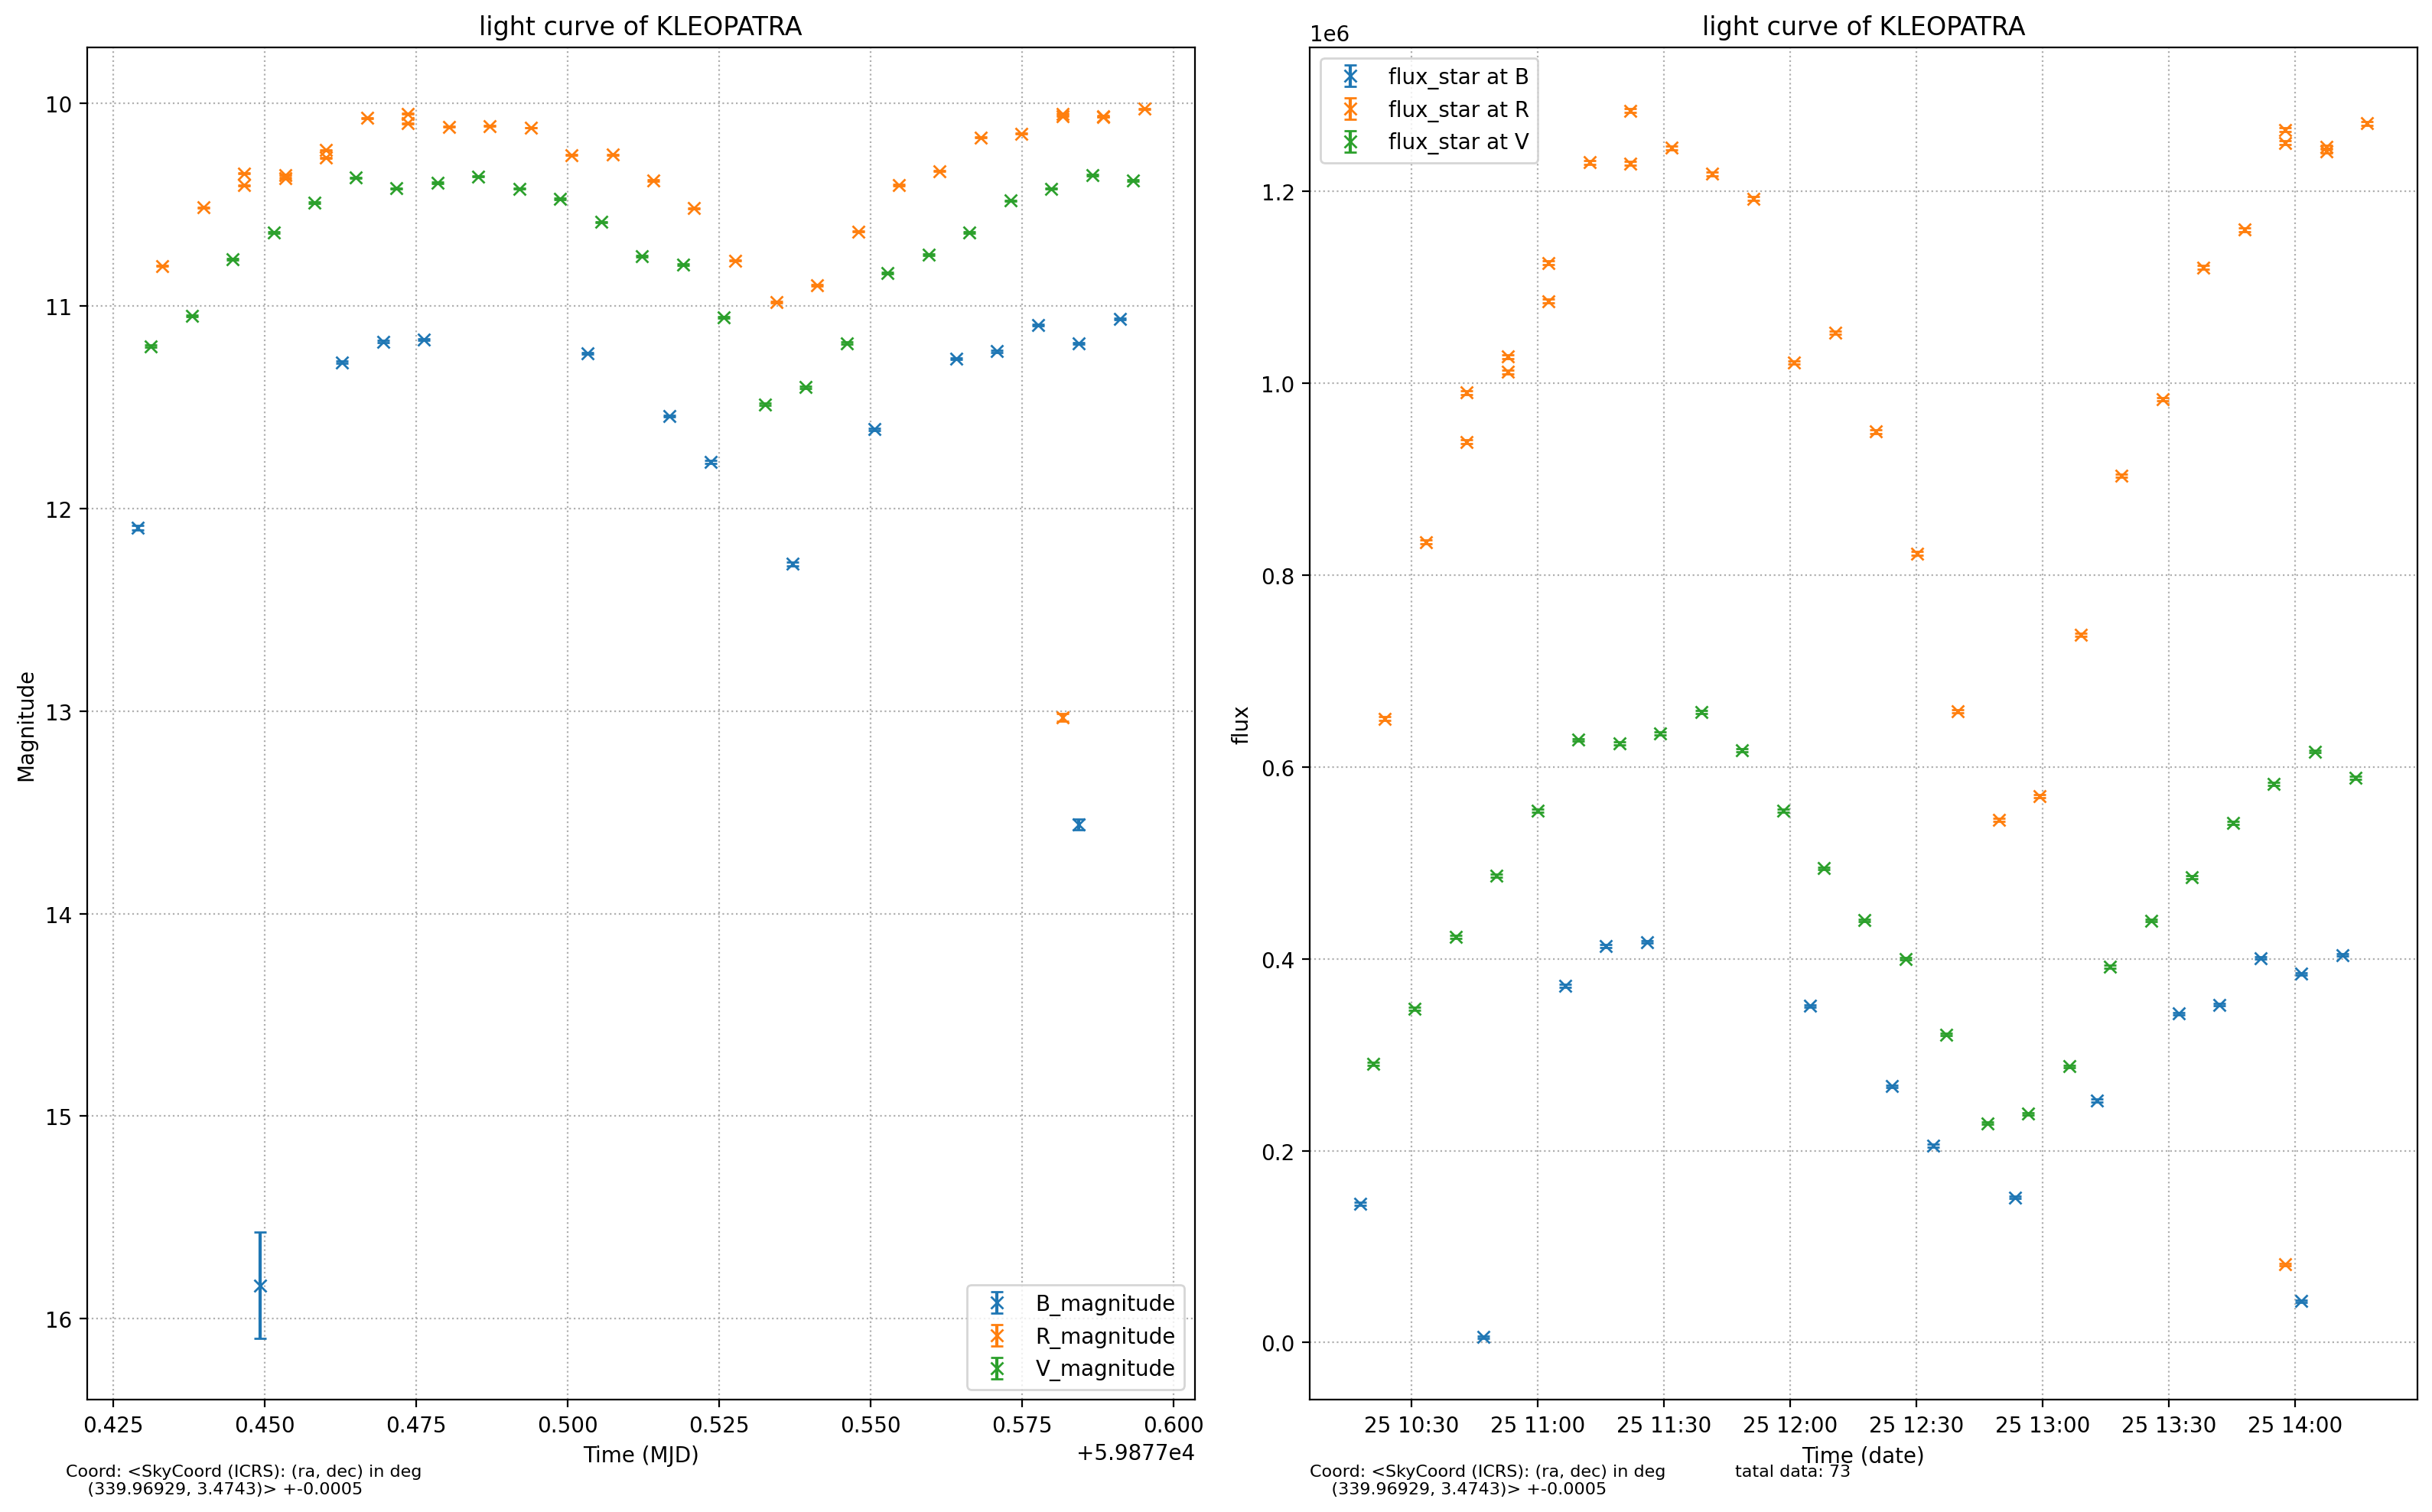

In [22]:
from astropy.time import Time

fig, axs = plt.subplots(1, 2, figsize=(16, 10),
                            sharex=False, sharey=False, gridspec_kw=None)

for chl in check_filter :
    # if f'{chl}_magnitude' in df_targ:
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd,
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ_chl["t_middle_dt"],
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
)
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(0, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')
axs[1].annotate(f'tatal data: {len(df_targ)}', fontsize=8,
                xy=(0, 0), xytext=(200, -30), va='top', ha='left',
                xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{fpath.parent}/light_curve_{coord_delta}1.png")

plt.show()

### 광도 곡선2

가로로 길게 광도 곡선을 그려볼 수도 있습니다.

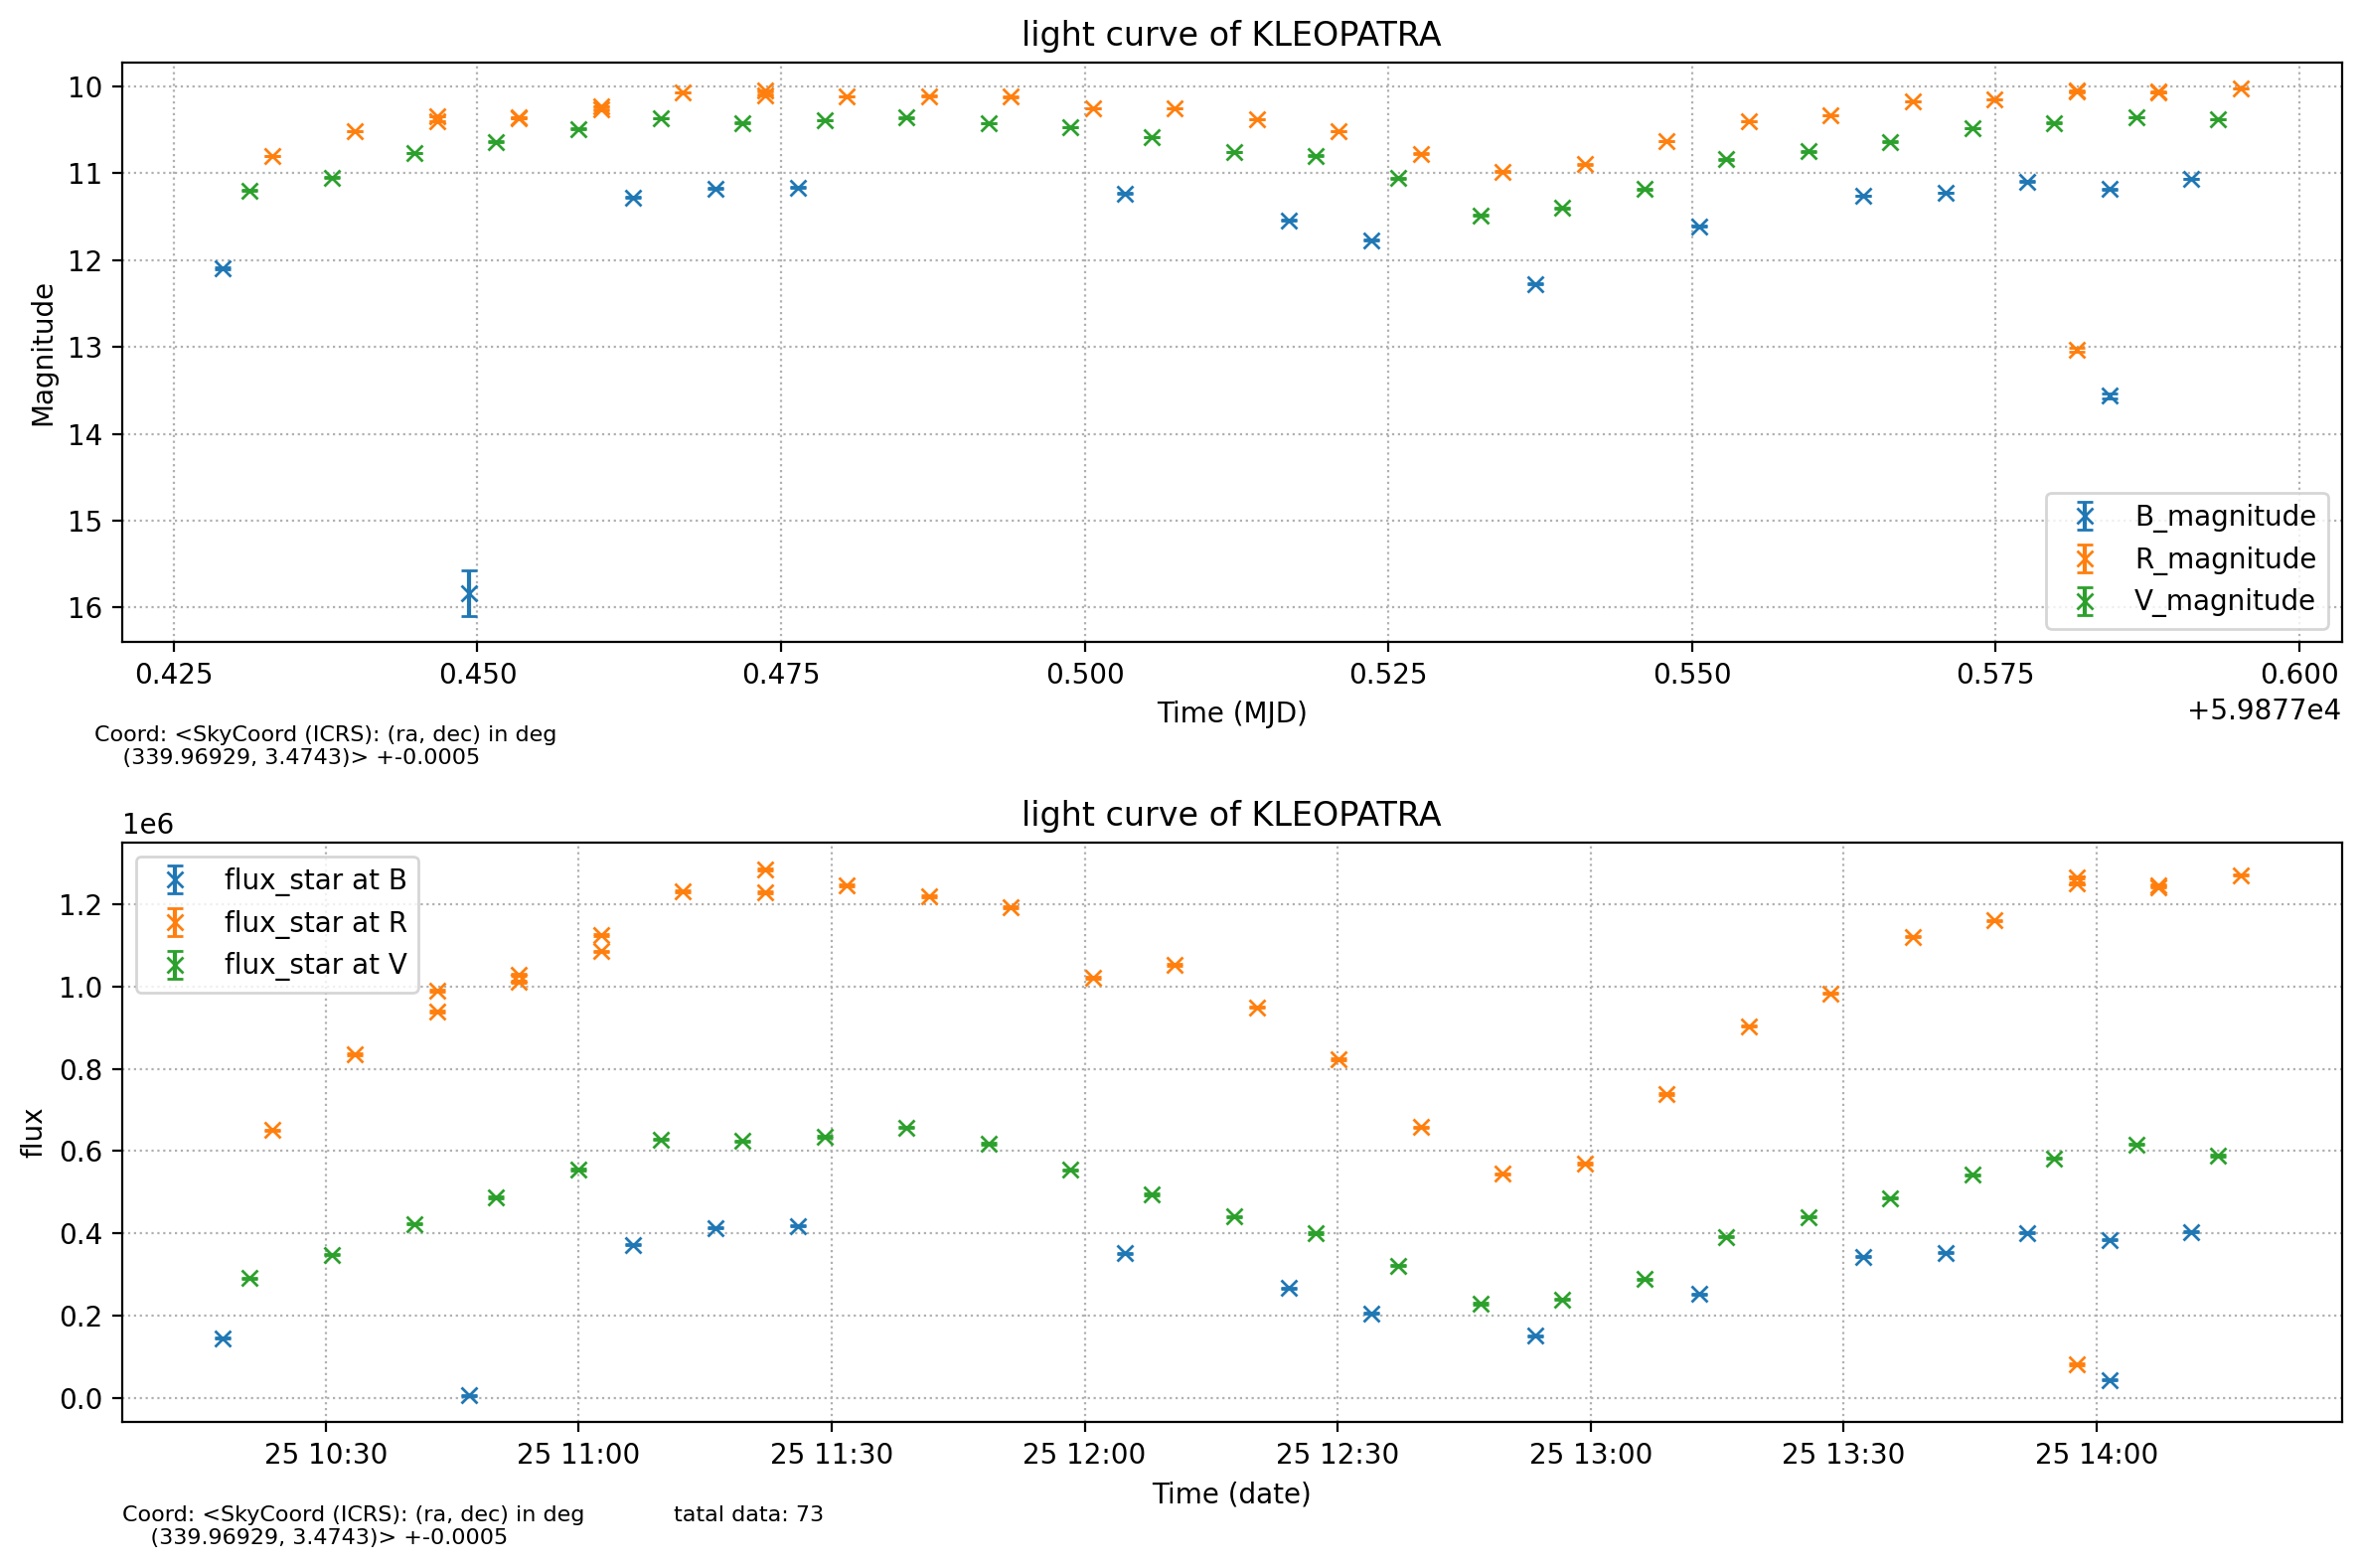

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8),
                            sharex=False, sharey=False, gridspec_kw=None)

for chl in check_filter :
    # if f'{chl}_magnitude' in df_targ:
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd,
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ_chl["t_middle_dt"],
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
    # ylim=(10.8+1, 10.8-1),
    # ylim=(11.25+1.2, 11.25-1.2),
    # ylim=(10.75+.6, 10.75-.6),
    # ylim=(10.8+.9, 10.8-.9),
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
)
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(0, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')
axs[1].annotate(f'tatal data: {len(df_targ)}', fontsize=8,
            xy=(0, 0), xytext=(200, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{fpath.parent}/light_curve_{coord_delta}2.png")

plt.show()

### 광도 곡선3

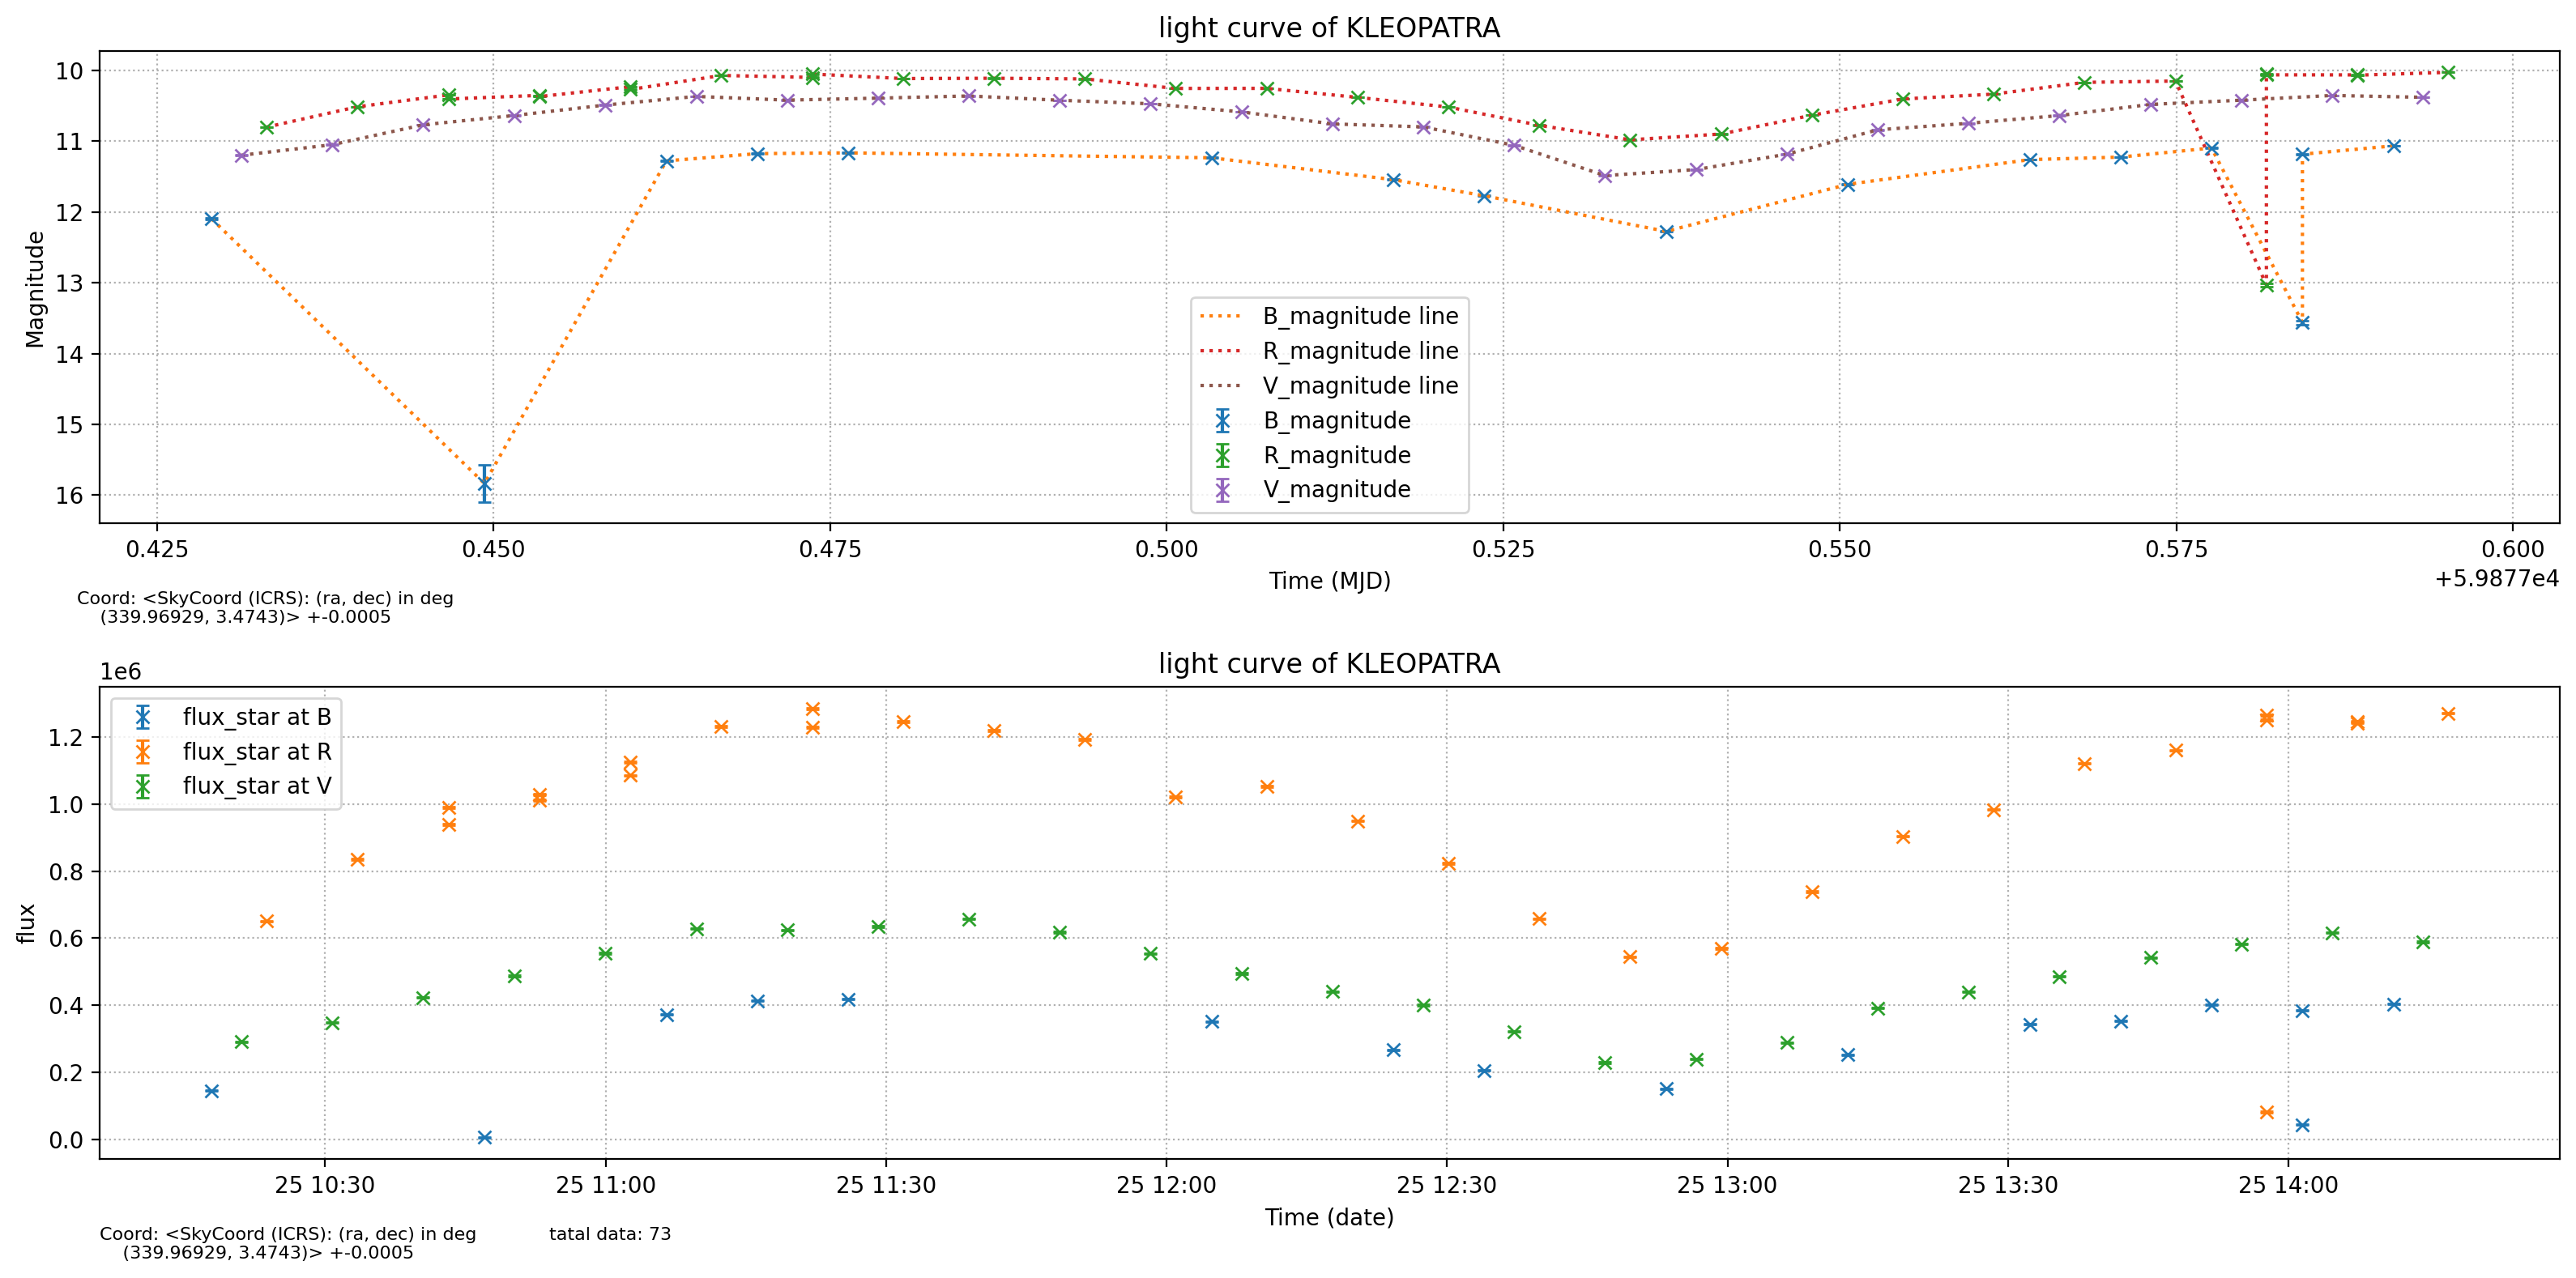

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8),
                            sharex=False, sharey=False, gridspec_kw=None)

for chl in check_filter :
    # if f'{chl}_magnitude' in df_targ:
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd,
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[0].plot(Time(df_targ_chl["t_middle_dt"]).mjd,
                df_targ_chl[f'{chl}_magnitude'],
                # marker='x',
                ls=':',
                #ms=10,
                # capsize=3,
                label=f'{chl}_magnitude line')
        axs[1].errorbar(df_targ_chl["t_middle_dt"],
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
    # ylim=(10.8+1, 10.8-1),
    # ylim=(11.25+1.2, 11.25-1.2),
    # ylim=(10.75+.6, 10.75-.6),
    # ylim=(10.8+.9, 10.8-.9),
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
)
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(0, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')
axs[1].annotate(f'tatal data: {len(df_targ)}', fontsize=8,
            xy=(0, 0), xytext=(200, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{fpath.parent}/light_curve_{coord_delta}2.png")

plt.show()

## (과제)

위의 "(**) 데이타프레임 필터링" 셀 에서 소행성 자료를 정확하게 필터링 할 수 있는 방법을 고안해 보시오.

In [25]:
# 이곳에 코딩을 완성하여 제출하시오.


